'\nNext Steps:\n'

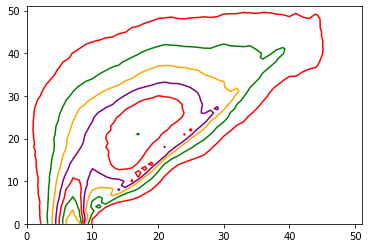

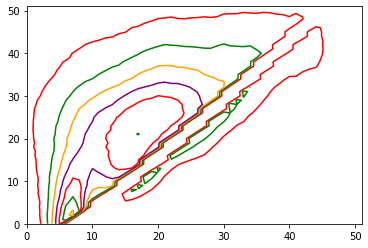

In [160]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import scipy as sp
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\\Users\19122\Desktop\AmBD1 (2).csv',header=0)

def croprange(X,a):
    '''
    inputs: 
    X --> EEM as a dataframe
    a --> The desired 1st emission wavelength
    output:
    X, cropped from a to len(number of columns in X), aka: as a mxm df
    '''
    ex_range = len(X.columns[1:])
    rows=X.iloc[:,0]
    row_ind=X.index[rows==a].values.astype(str).astype(int)
    row_ind=row_ind[0]
    #315 --> 565
    X=X.loc[row_ind:row_ind+ex_range,:]
    X=X.reset_index(drop=True)
    return(X)

def findraman(X):
    '''
    inputs: 
    X --> EEM as a dataframe
    output: raman_peak_list = an int list of the emission wavelengths
            where the raman scatter peaks live
    '''
    raman_peak_list=[]
    columns = X.columns[1:]
    for ex in columns:
        nm_to_cm=1/float(ex)
        raman_peak=nm_to_cm-0.00036 #this is what Rasman Bro uses
        raman_peak=1/raman_peak
        raman_peak_list.append(round(raman_peak))
    return(raman_peak_list)
    
def unscatter(X,arg1,arg2,width):
    '''
    inputs: 
    X --> EEM as a dataframe
    arg1 --> 0: raman or 1: raleigh depending on scatter
    arg2 --> 1 or 2, 1st or 2nd order outputs: EEM with scatter specified removed
    width=nm desired to remove on either side of the raman scatter peal
    
    outputs:
    X with scatter taken out at desired width
    '''
    if arg1==0:
        #the row/emission values of center of raman scatter 
        ram_em=findraman(X)
        #empty list to fill with all emissions to be removed (whether or not present in the df)
        ram_em_list=[]
        #empty list to fill with row/emission indices associated with ram_em
        ram_ind=[]
        #dataframe of the rows
        rows=X.iloc[:,0]
        #columns_int = df.columns[1:].values.astype(str).astype(int).tolist()
        #dataframe of the columns
        columns = X.columns[1:]
        #this forloop expands the nm around ram_em to include a width given by arg="width"
        for r in ram_em:
            ram_em_placehold=[]
            ram_em_placehold.append(r)
            for w in np.arange(width):
                ram_em_placehold.append(r+w+1)
                ram_em_placehold.append(r-w-1)
            ram_em_placehold.sort()
            ram_em_list.append(ram_em_placehold)
        #this forloop turns from em values to em indices of ram_em_list
        for r in ram_em_list:
            ind=[]
            for r2 in r:
                r3_prep=X.index[rows==r2].values.astype(str).astype(int).tolist()
                for r3 in r3_prep:
                    ind.append(r3)
            ram_ind.append(ind)
        indpt=1
        #this forloop goes to the appropriate index and deletes the scatter
        for ram in ram_ind:
            for ram1 in ram:
                ram1=int(ram1)
                X.iloc[ram1,indpt]=0
            indpt=indpt+1
        return(df)

df=croprange(df,315) 
plt.figure()
CF_pre=plt.contour(df, colors=['red', 'green', 'orange', 'purple'], extend='both')
unscatter(df,0,0,10)
plt.figure()
CP_post=plt.contour(df, colors=['red', 'green', 'orange', 'purple'], extend='both')

'''
Next Steps:
'''
        